In [2]:
import pandas as pd
import numpy as np
import pandas_ta as pta
import ta
# from datapackage import Package
# from selenium import webdriver
# import requests
# from bs4 import BeautifulSoup
# import yfinance as yf
import os
import random
import shutil
import time
from tensorflow.keras.layers import LSTM
import tensorflow as tf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from numpy import array
from tensorflow.keras.utils import plot_model
import graphviz
import pydot
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
ticker_code = "A"
csv_file = "data/" + ticker_code + ".csv"
shift = -1
dataset = pd.read_csv(csv_file)
dataset = dataset.drop(columns=["Date", "Dividends", "Stock Splits"])
train_set_len = int(len(dataset) * 0.8)
train_set = dataset[:train_set_len]
test_set = dataset[train_set_len:]
X_train = train_set["Close"]
y_train = train_set["Close"].shift(shift).dropna()
X_test = test_set["Close"]
y_test = test_set["Close"].shift(shift).dropna()
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
X_train = np.array(X_train.dropna()[:-1]).reshape(-1,1)
X_train_scaled = x_scaler.fit_transform(X_train)
y_train_scaled = y_scaler.fit_transform(np.array(y_train).reshape(-1,1))
X_test = np.array(X_test.dropna()[:-1]).reshape(-1,1)
X_test_scaled = x_scaler.transform(X_test)
y_test_scaled = y_scaler.transform(np.array(y_test).reshape(-1,1))

C:\Users\BogPoet\AppData\Local\Temp\ipykernel_24952\1788344482.py:18: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  X_test = np.array(X_test.dropna()[:-1]).reshape(-1,1)


In [330]:
dataset

,Open,High,Low,Close,Volume
0,128.459755,129.615707,126.277401,127.114464,3403100
1,127.413416,128.529499,122.002382,122.660072,1757600
2,122.530518,128.738760,121.872827,128.649078,1444400
3,127.174265,128.270422,125.978452,128.041229,1722800
4,128.928115,129.545944,126.526529,127.184219,1310600
...,...,...,...,...,...
121,145.619995,147.160004,144.429993,145.139999,1691900
122,151.979996,157.440002,151.979996,156.860001,3512500
123,156.669998,157.279999,154.350006,155.350006,1444100
124,155.089996,156.960007,154.710007,156.960007,642700


In [16]:
# X_train_scaled = list(range(15))
X_test_scaled.shape, X_train_scaled.shape, y_train_scaled.shape, y_test_scaled.shape

((25, 1), (99, 1), (99, 1), (25, 1))

In [17]:
steps = 5
X_train_list = []
for i in range(steps, len(X_train_scaled)):
	X_train_list.append(X_train_scaled[i-steps:i])
X_train_list = np.array(X_train_list)

In [18]:
X_train_list.shape, X_test_scaled.shape

((94, 5, 1), (25, 1))

In [27]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(steps, X_train_list.shape[2]), return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(units=1, activation='relu'))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train_list, y_train_scaled[:(steps * -1)], epochs=50, batch_size=32)

Epoch 1/50
3/3 [==============================] - 9s 12ms/step - loss: 0.2750
Epoch 2/50
3/3 [==============================] - 0s 14ms/step - loss: 0.2750
Epoch 3/50
3/3 [==============================] - 0s 21ms/step - loss: 0.2750
Epoch 4/50
3/3 [==============================] - 0s 17ms/step - loss: 0.2750
Epoch 5/50
3/3 [==============================] - 0s 19ms/step - loss: 0.2750
Epoch 6/50
3/3 [==============================] - 0s 19ms/step - loss: 0.2750
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2750
Epoch 8/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2750
Epoch 9/50
3/3 [==============================] - 0s 17ms/step - loss: 0.2750
Epoch 10/50
3/3 [==============================] - 0s 19ms/step - loss: 0.2750
Epoch 11/50
3/3 [==============================] - 0s 14ms/step - loss: 0.2750
Epoch 12/50
3/3 [==============================] - 0s 18ms/step - loss: 0.2750
Epoch 13/50
3/3 [==============================] - 0s 17ms/st

In [28]:
X_test_list = []
for i in range(steps, len(X_test)):
	X_test_list.append(X_test[i-5:i])

In [29]:
X_test_list, y_test = np.array(X_test_list), np.array(y_test)

In [30]:
model.evaluate(X_test_list, y_test_scaled[:(steps * -1)])

1/1 [==============================] - 2s 2s/step - loss: 0.9097


0.909674346446991

In [31]:
pred = model.predict(X_test_list)
pred2 = model.predict(X_train_list)

3/3 [==============================] - 0s 5ms/step


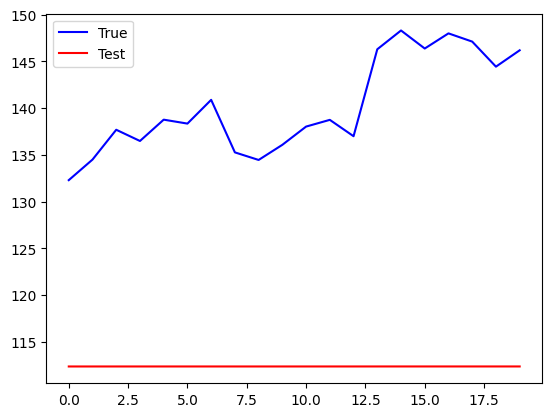

In [32]:
import matplotlib.pyplot as plt

plt.plot(y_test[:(steps * -1)], label="True", c = "blue")
plt.plot(y_scaler.inverse_transform(pred), label="Test", c = "red")
plt.legend()
plt.show()

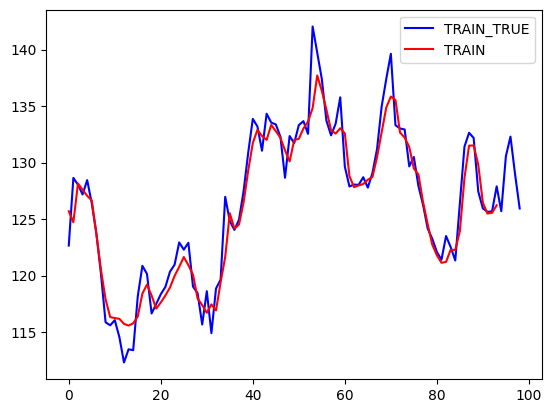

In [25]:

plt.plot(y_train, label = "TRAIN_TRUE", c = "blue")
plt.plot(y_scaler.inverse_transform(pred2), label="TRAIN", c = "red")
plt.legend()
plt.show()

In [26]:
y_scaler.inverse_transform(pred)


array([[158.01376],
       [158.01363],
       [158.01349],
       [158.01332],
       [158.01338],
       [158.01326],
       [158.01328],
       [158.01318],
       [158.01346],
       [158.01349],
       [158.01341],
       [158.01329],
       [158.01328],
       [158.01332],
       [158.01288],
       [158.01282],
       [158.01288],
       [158.01282],
       [158.01286],
       [158.01297]], dtype=float32)